### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

### Learn About Data
- CarID: Identification Number for Each Car
- SafetyRating: Car's Safety Rating
- CarName: Name of the Car Model
- FuelType: Type of Fuel Used (Gasoline, Diesel, Electric, etc.)
- Aspiration: Type of Aspiration (Standard or Turbocharged)
- NumDoors: Number of Doors on the Car
- BodyStyle: Style of the Car's Body (Sedan, Coupe, SUV, etc.)
- DriveWheelType: Type of Drive Wheels (Front, Rear, All)
- EngineLocation: Location of the Car's Engine (Front or Rear)
- Wheelbase: Length of the Car's Wheelbase
- CarLength: Overall Length of the Car
- CarWidth: Width of the Car
- CarHeight: Height of the Car
- CurbWeight: Weight of the Car without Passengers or Cargo
- EngineType: Type of Engine (Gas, Diesel, Electric, etc.)
- NumCylinders: Number of Cylinders in the Engine
- EngineSize: Size of the Car's Engine
- FuelSystem: Type of Fuel Delivery System
- BoreRatio: Bore-to-Stroke Ratio of the Engine
- Stroke: Stroke Length of the Engine
- CompressionRatio: Compression Ratio of the Engine
- Horsepower: Car's Engine Horsepower
- PeakRPM: Engine's Peak RPM (Revolutions Per Minute)
 - CityMPG: Miles Per Gallon (MPG) in City Driving
- HighwayMPG: MPG on the Highway
- CarPrice: Price of the Car

### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model


### 1) Problem Statement
Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as safety ratings, dimensions, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.


### 2) Import libraries

In [168]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [169]:
df = pd.read_csv(r'C:\Users\parha\Documents\Data_Analysis_projects\Car\CarPrice_Assignment.csv')

In [170]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


### 3) Data Checks to Perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categorical columns

In [171]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(205, 26)
--------------------------- COLUMNS ---------------------------
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=205, step=1)
--------------------------- VALUE TYPES ---------------------------
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carleng

Insights from Statistics:

1. Car Variety 🚗🚙:
 - Dataset covers 205 car models, each unique in attributes.
 - Sizes, weights, and engine capacities vary across cars.
2. Price Range 💰:
 - Mini Price: 5,118 dollar
 - Maxi Price: 45,400 dollar
 - Average car price is about $13,276.
3. Engine Diversity 🛠️:
 - Engines differ in bore diameter (boreratio) and stroke length (stroke).
 - Risk ratings (symboling) vary from -2 to 3.
4. Data Distribution 📊:
- Features like carwidth, curbweight, enginesize show notable variability.
- Potential outliers present in compressionratio and horsepower.

In [172]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [173]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [174]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 10
num_col: 16
--------------------------------------------------------------------------------
Categorical : Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [175]:
cat_col_without_name = [col for col in categorical_cols if col != 'CarName']
for i in cat_col_without_name:
    print(f'category in {i}: {df[i].unique()} ')

category in fueltype: ['gas' 'diesel'] 
category in aspiration: ['std' 'turbo'] 
category in doornumber: ['two' 'four'] 
category in carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
category in drivewheel: ['rwd' 'fwd' '4wd'] 
category in enginelocation: ['front' 'rear'] 
category in enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 
category in cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 
category in fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 


### 4) Exploratory data analysis



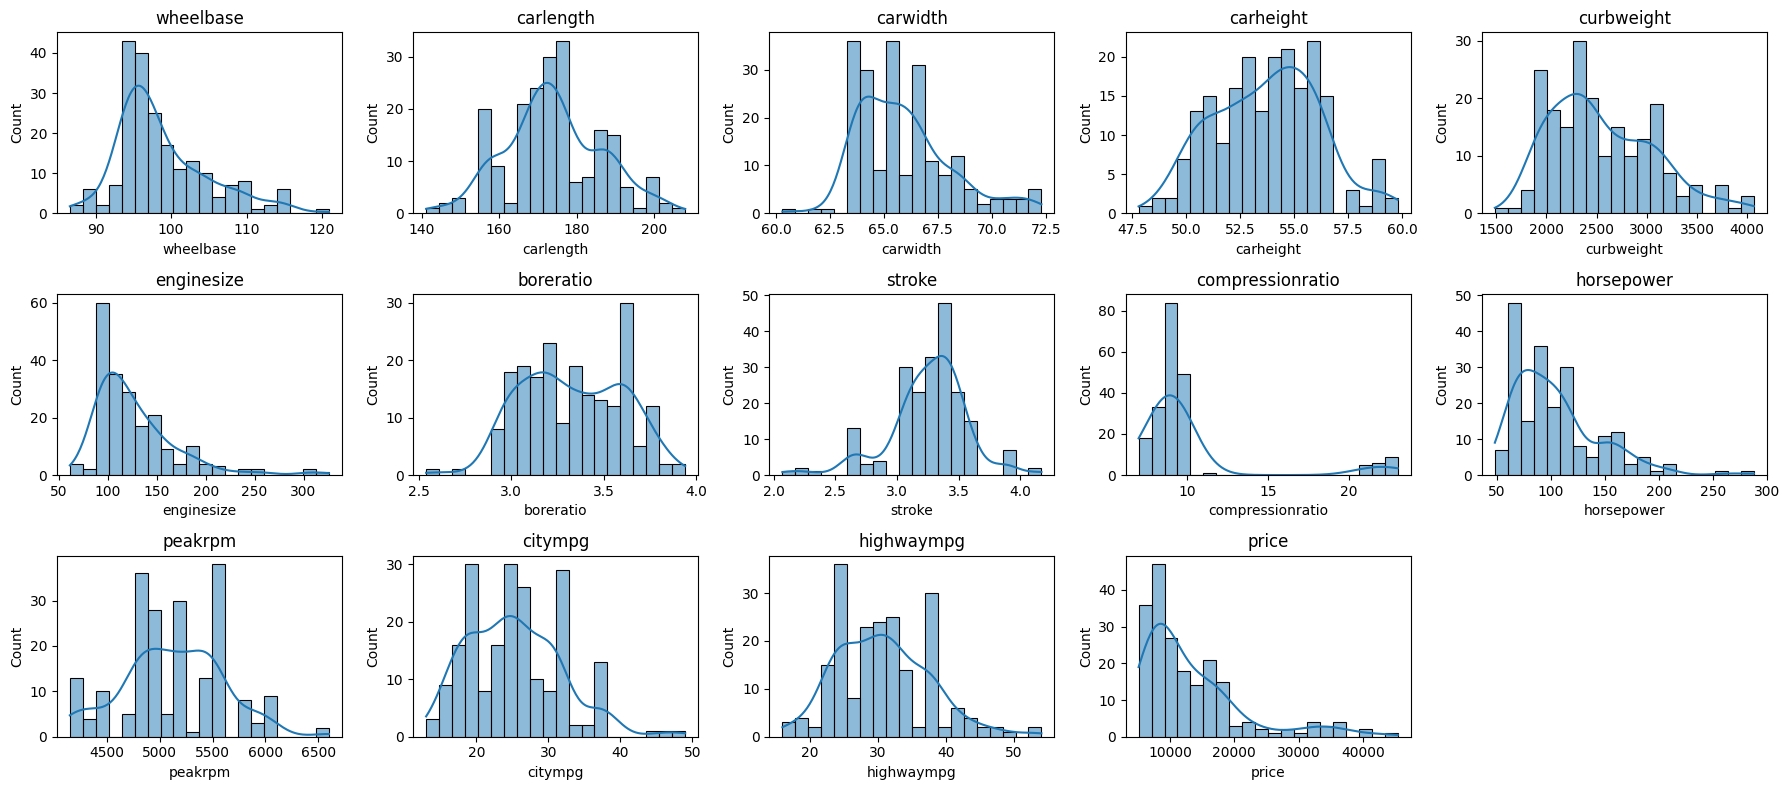

In [176]:
# Distribution of Numerical Features
numerical_features = [col for col in numerical_cols if col not in ('car_ID', 'symboling')]

plt.figure(figsize=(18,8))
for feature in numerical_features:
    plt.subplot(3,5,numerical_features.index(feature)+ 1)
    sns.histplot(data=df[feature],bins=20,kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

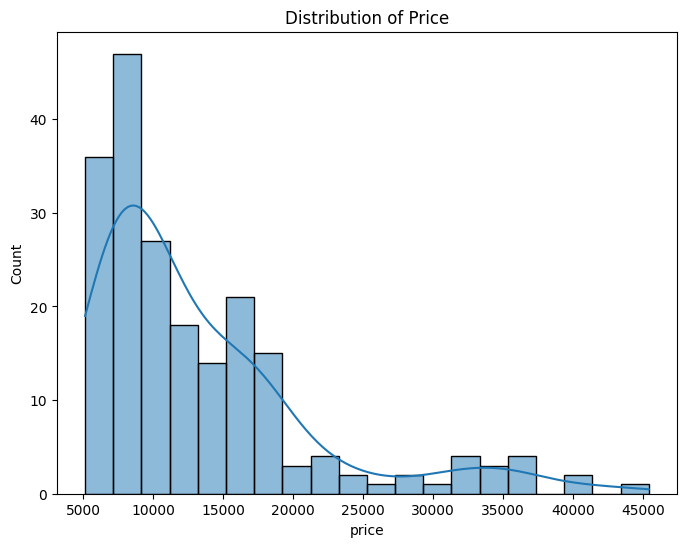

In [177]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

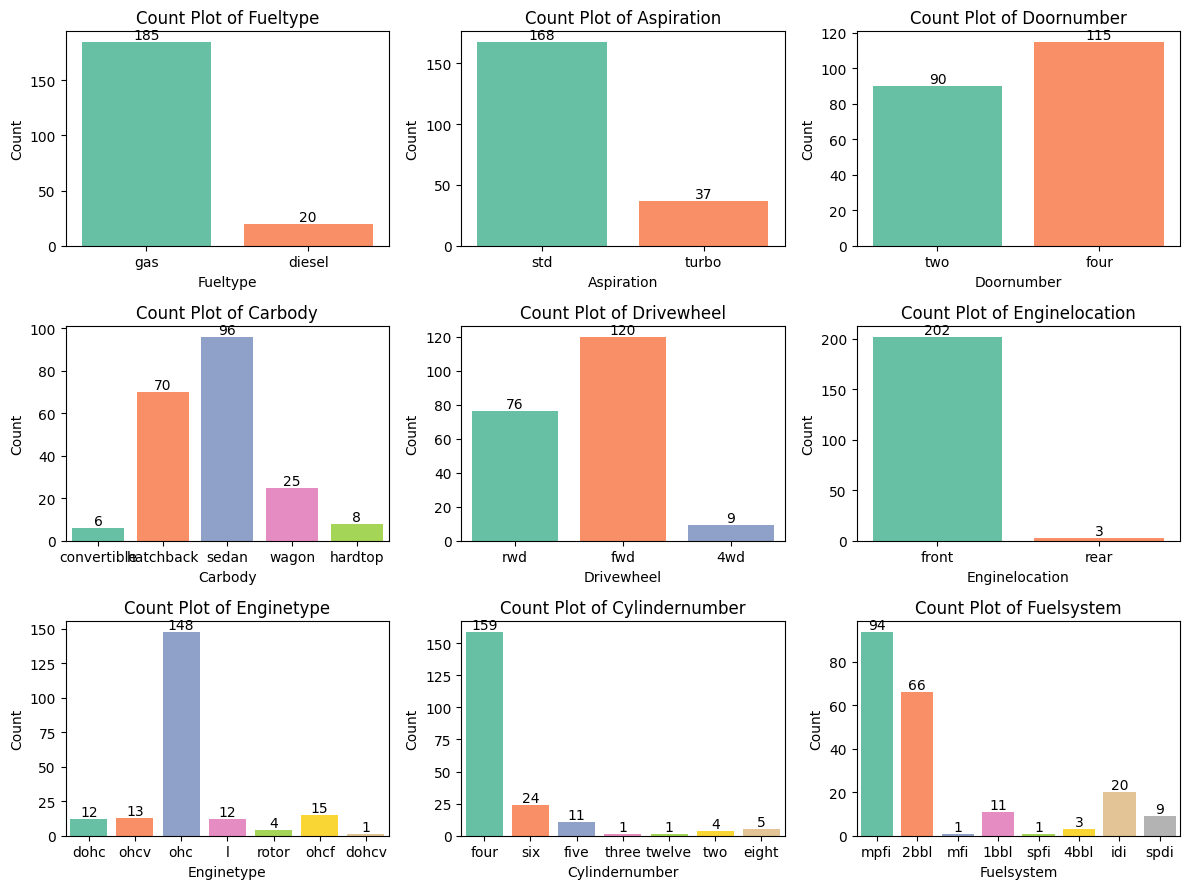

In [178]:
# Define the list of categorical columns to analyze
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(cat_col_without_name):
    sns.countplot(x=df[column], data=df, palette='Set2', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

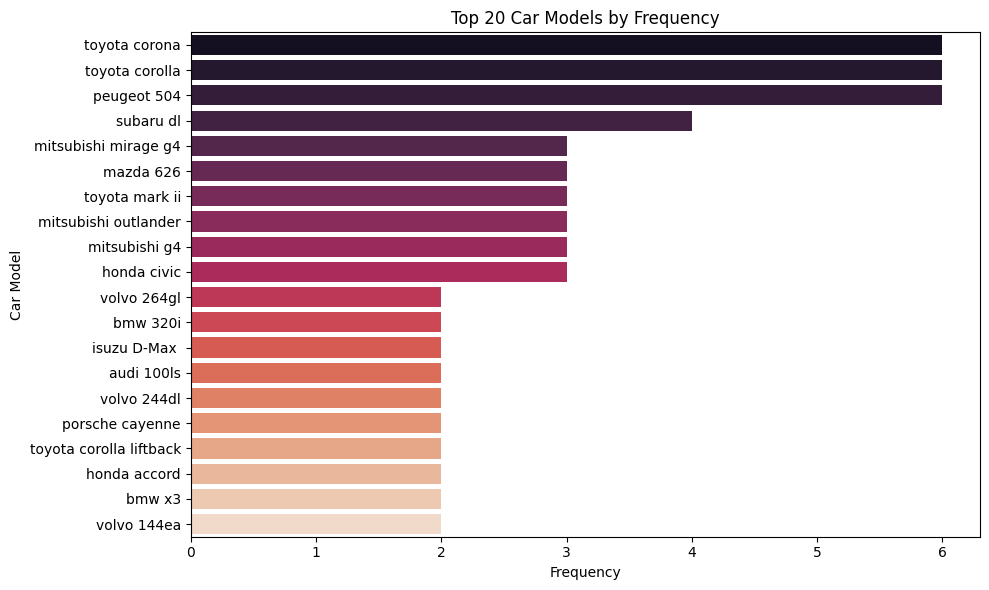

In [179]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='rocket')
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

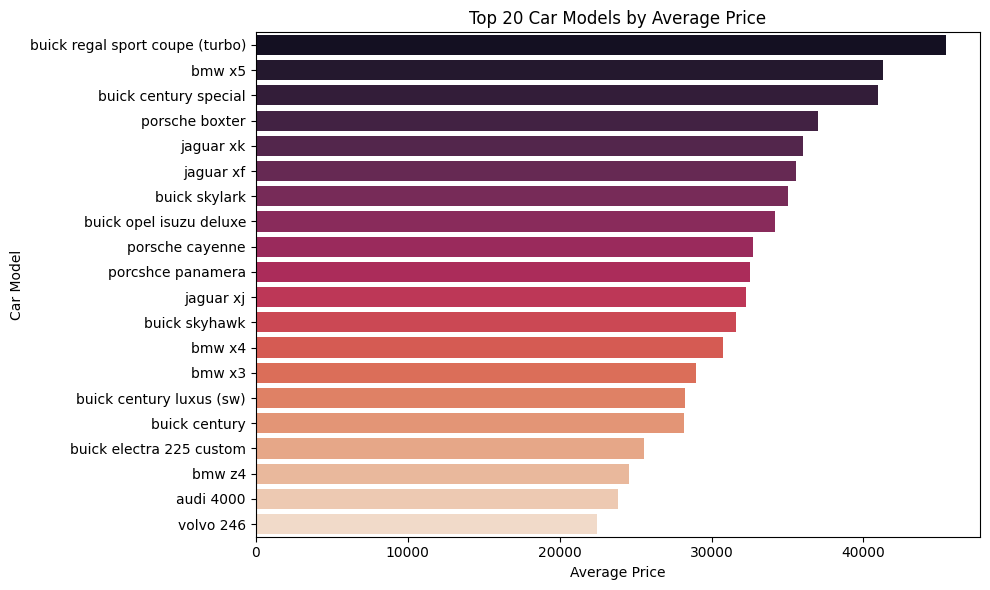

In [180]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

n = 20
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='rocket')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [181]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


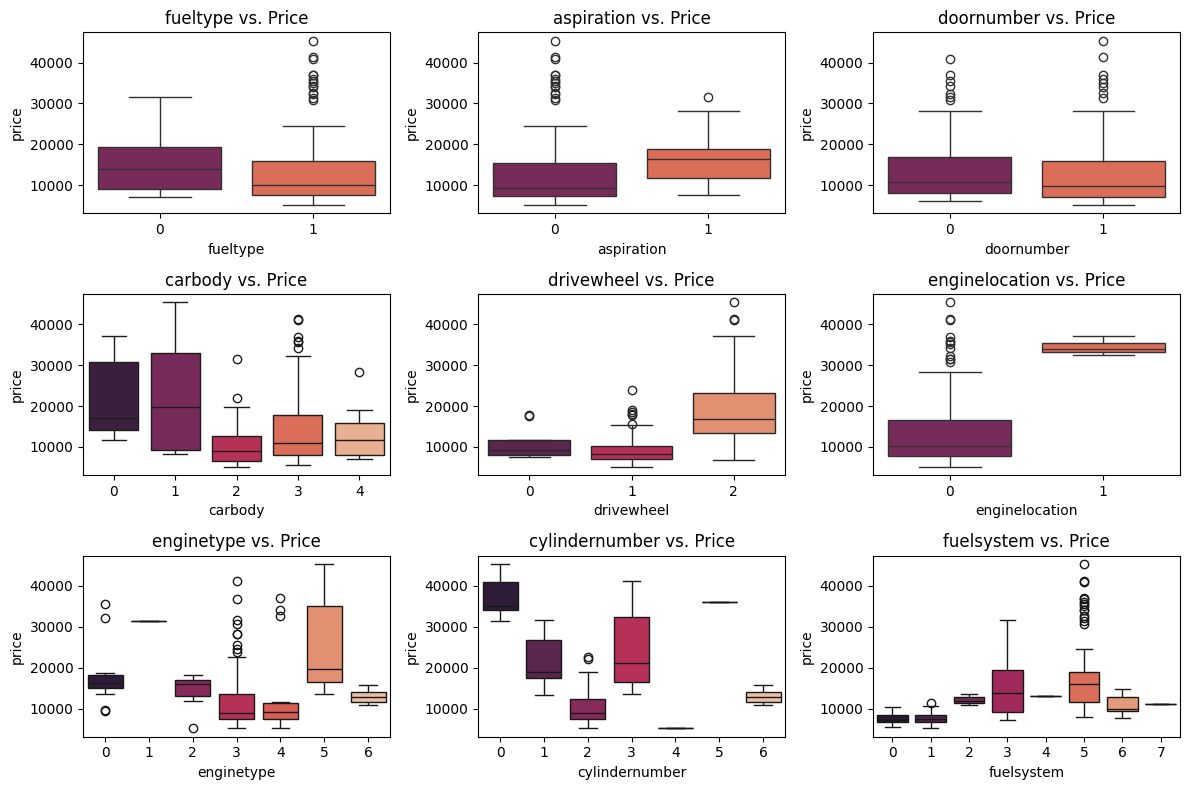

In [195]:
# Categorical Feature vs. Price
plt.figure(figsize=(12,8))
for feature in cat_col_without_name:
    plt.subplot(3, 3, cat_col_without_name.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price', palette='rocket')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

# n_features = len(categorical_cols)
# n_cols = 3  # Set the number of columns in the grid
# n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

# plt.figure(figsize=(n_cols * 4, n_rows * 4))
# for i, feature in enumerate(cat_col_without_name):
#     plt.subplot(n_rows, n_cols,  cat_col_without_name.index(feature) + 1)
#     sns.boxplot(data=df, x=feature, y='price', palette='rocket')
#     plt.title(f'{feature} vs. Price')

# plt.tight_layout()
# plt.show()

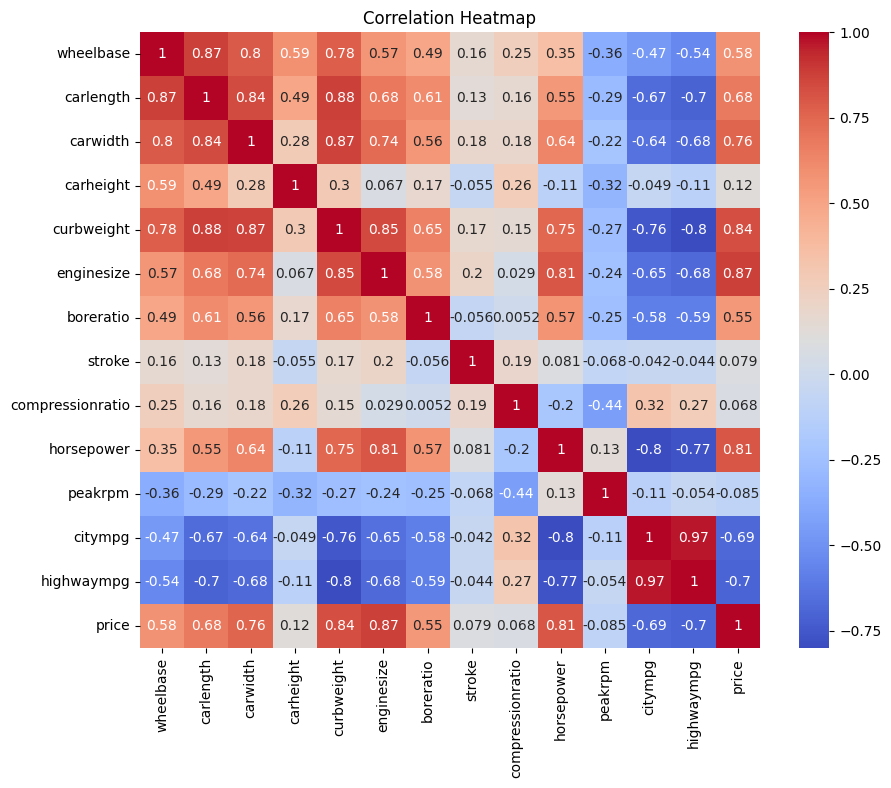

In [183]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
  Analysis Results 📊🔍.
</p>

- We have DataSet > Car Price 👍
- The Shape DataSet = (Rows = 205, columns = 26) 👊
- No null value 🚫📛
- No Duplicated value 🚫🔁

Some Analyst 👀👀

Price cars 💰💥
- Avg price = $13,276 💵

- Min price = $5,118 💲

- Max price = $45,400 💲💲

The famous or repeats car > Toyota 🚗😊😊¶

 - Most using car working in Gas around 90% and the average price less than the car working in Diesel. 😨😨
 - some category using the car working in Diesel around 10%, but the average price is more than the car working on Gas. 💥💥

 - Most cars stand around 82%, also the average price less for Turbo, with turbo cars comprising around 18%. 😪😪

 - Approximately 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors; sports cars maintain a similar average price. 👍👍

 - Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices. 👍👍

 - Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.

 - The most common engine type is "ohc," correlating with lower prices.

 When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders

 As the engine size increases, so does the price

 The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact. 😨😨

### 5) Data Pre-Processing

In [184]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [185]:
df['Brand'] = df['CarName'].apply(lambda x : x.split(' ')[0])
df['Model'] =  df['CarName'].apply(lambda x : ' '.join(x.split(' ')[1:]))

In [186]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [187]:
# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand', 'Model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [188]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,power_to_weight_ratio,wheelbase_squared,carlength_squared,carwidth_squared,carheight_squared,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,alfa-romero giulia,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.26296,-0.646553,-0.546059,13495.0,1,79,0.043564,7849.96,28493.44,4108.81,2381.44,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197


### 6) Train the Model

In [189]:
# # Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [190]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8615670883277456
Mean Squared Error: 10928450.669486254


In [191]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,24644.498944,6115.501056
9,17859.167,19770.234283,-1911.067283
100,9549.000,8323.732429,1225.267571
132,11850.000,13885.801565,-2035.801565
68,28248.000,26718.615838,1529.384162
95,7799.000,7079.308257,719.691743
159,7788.000,10106.850948,-2318.850948
162,9258.000,6570.571036,2687.428964
147,10198.000,10418.264331,-220.264331
182,7775.000,10904.998474,-3129.998474


<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
  Final Results 🔍.
</p>

📊 Model Performance 🚀😃😃¶

Rejoice, for the R2 Score shines at an impressive 86.1%! 🌟😃

Model Rankings 🏆😃😃
 - Linear Regression: Takes the lead with a solid 86.1% performance.❤️

So , the best model Linear Regression 87.1